# Project 2 : RL For Autonomoous Driving
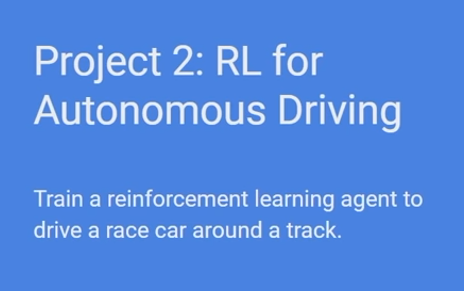 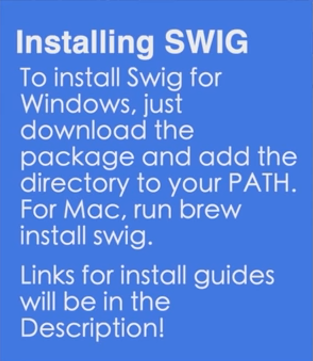

## 1. Import Dependencies

In [4]:
# ! pip install gym[box2d] pyglet

In [6]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import os

## 2. Test Environment

In [7]:
environment_name = "CarRacing-v0" 
env = gym.make(environment_name)
env.reset()

Track generation: 1221..1530 -> 309-tiles track


d:\Src\Anaconda\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [9]:
env.action_space,env.observation_space

(Box([-1.  0.  0.], [1. 1. 1.], (3,), float32),
 Box([[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]
 
  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]
 
  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]
 
  ...
 
  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]
 
  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]
 
  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]], [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]
 
  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]
 
  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]
 
  ...
 
  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]
 
  [[255 255 255]
   [255 255 

In [10]:
env.render()

True

In [21]:
env.close()

In [12]:
episodes = 5  # think of it as one episode of full game
for episode in range(1,episodes+1):
    obs = env.reset()  # reset the agent , action , environment , obsevation , rewards
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()  # return random value between (0,1)
        obs,reward , done,info = env.step(action)
        score += reward
        
        # print(f"Action: {action} ,Score: {score} >> Other Infos: n_state {n_state},Reward {reward},Done {done}")
    print(f'Episode: {episode}, Score:{score}')
env.close()

Track generation: 1072..1344 -> 272-tiles track
Episode: 1, Score:-29.889298892989363
Track generation: 1067..1338 -> 271-tiles track
Episode: 2, Score:-25.925925925926155
Track generation: 1280..1604 -> 324-tiles track
Episode: 3, Score:-38.08049535603777
Track generation: 1054..1325 -> 271-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1032..1303 -> 271-tiles track
Episode: 4, Score:-22.222222222222403
Track generation: 1275..1597 -> 322-tiles track
Episode: 5, Score:-37.69470404984478


## 3. Train Model

In [15]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

log_path = os.path.join("Training","logs")
model = PPO('CnnPolicy', env , verbose=1 , tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [16]:
# Training the model
model.learn(total_timesteps=50)

Track generation: 1192..1494 -> 302-tiles track


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


Logging to Training\logs\PPO_6
Track generation: 1167..1463 -> 296-tiles track
Track generation: 1309..1640 -> 331-tiles track
-----------------------------
| time/              |      |
|    fps             | 21   |
|    iterations      | 1    |
|    time_elapsed    | 97   |
|    total_timesteps | 2048 |
-----------------------------


## 4. Save Model

In [17]:
ppo_path = os.path.join("Training" , "Saved Models" , "PPO_Driving_Model")
model.save(ppo_path)

In [18]:
del model 

In [19]:
model = PPO.load(ppo_path,env =env)

Wrapping the env in a VecTransposeImage.


## 5. Evaluate and Test

In [22]:
evaluate_policy(model,env , n_eval_episodes=10,render=True)

d:\Src\Anaconda\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Track generation: 1151..1443 -> 292-tiles track
Track generation: 1129..1415 -> 286-tiles track
Track generation: 1172..1469 -> 297-tiles track
Track generation: 1152..1444 -> 292-tiles track
Track generation: 1128..1414 -> 286-tiles track
Track generation: 1009..1270 -> 261-tiles track
Track generation: 1011..1275 -> 264-tiles track


KeyboardInterrupt: 

In [ ]:
env.close()

In [24]:
episodes = 5  # think of it as one episode of full game
for episode in range(1,episodes+1):
    obs = env.reset()  # reset the agent , action , environment , obsevation , rewards
    
    done = False
    score = 0
    
    while not done:
        env.render()
        action ,_= model.predict(obs) # we now using model here
        obs ,reward , done,info = env.step(action)
        score += reward
        
        print(f"Action: {action} ,Score: {score} >> Other Infos: n_state {obs},Reward {reward},Done {done}")
    print(f'Episode: {episode}, Score:{score}')
env.close()

Track generation: 1051..1318 -> 267-tiles track
Action: [[1. 1. 0.]] ,Score: [7.418797] >> Other Infos: n_state [[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]],Reward [7.418797],Done [False]
Action: [[-0.4903466   0.03329368  0.        ]] ,Score: [7.318797] >> Other Infos: n_state [[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

 

KeyboardInterrupt: 